# TITANIC SURVIVAL PREDICTION

In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# load the dataset
df = pd.read_csv(r"C:\Users\kanim\Downloads\archive (1)\titanic.csv")

In [ ]:
# print the first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# information about column data type and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
#gives basic stats like mean,count,etc.,
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
# returns null values in each column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# fill the null values in age column as median of age
df['Age'].fillna(df['Age'].median(),inplace = True)

C:\Users\kanim\AppData\Local\Temp\ipykernel_15108\1750550615.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace = True)


In [ ]:
# fill the null values in embarked column as most common used word(mode)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [ ]:
# drop the cabin column because of too many missing values
df.drop('Cabin', axis=1 ,inplace=True)

In [ ]:
# encode male , female = 0,1
df['Sex']=df['Sex'].map({'male' :0,'female' : 1})

In [ ]:
# consider the Embarked columns (Q,S) as dummies
df=pd.get_dummies(df,columns=['Embarked'],drop_first=True)

In [ ]:
# target variable(y) and features(X)
X = df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked_Q','Embarked_S']]
y = df['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# train and test data split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# train the model
model = RandomForestClassifier()
model.fit(X_train,y_train)

# predict the result
y_pred = model.predict(X_test)

# print the accuracy
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 1.0


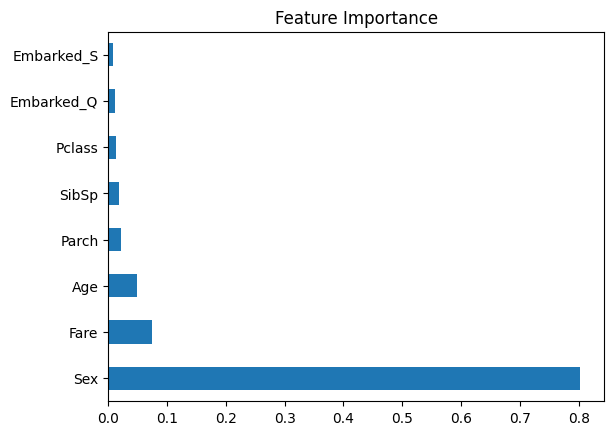

In [ ]:
# feature importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.title("Feature Importance")
plt.show()